<a href="https://colab.research.google.com/github/casper6020/Syed_tahfim_projects/blob/main/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.shape

(4269, 13)

**Check the number of observations, columns and datatypes.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**The load ID column is irrelevant for the prediction. So, we can drop this column.**

In [4]:
df.drop("loan_id", axis=1, inplace=True)

### Exploratory Data Analysis

In [5]:
df.isnull().sum()  #Check If there is any Null values

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

**None of the variables has null values.**

In [6]:
#Check the columns names
cols = df.columns.to_list() 
print(cols)

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


**The columns names have white spaces, we need to clean them.**

In [7]:
cols = [col.strip() for col in cols]
df.columns = cols
print(cols)

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


**Seprate the numerical columns from the categorical columns based on their data types**

In [8]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
print(set(num_cols))
print(set(cat_cols))

{'no_of_dependents', 'income_annum', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'commercial_assets_value', 'loan_term', 'residential_assets_value', 'bank_asset_value'}
{'education', 'loan_status', 'self_employed'}


In [9]:
# Check if any numerical column has negative value 
for col in num_cols:
    if (df[col] < 0).any():
        print(col)

residential_assets_value


In [10]:
# Transform the negative values to absolute values 
df["residential_assets_value"] = abs(df["residential_assets_value"])

**For simplification, we changed income_annum,loan_amount, residential_assets, commercial_assets, luxury_assets and bank_assets values into millions.**

In [11]:
cols_to_millions = ["income_annum","loan_amount","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]
for col in cols_to_millions: 
    df[col] = round(df[col]/1e6,2)

**Descriptive Statistics for the numerical variable**

In [12]:
df[num_cols].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124,15.133450,10.900445,599.936051,7.473928,4.973155,15.126306,4.976692
std,1.695910,2.806840,9.043363,5.709187,172.430401,6.502129,4.388966,9.103754,3.250185
min,0.000000,0.200000,0.300000,2.000000,300.000000,0.000000,0.000000,0.300000,0.000000
25%,1.000000,2.700000,7.700000,6.000000,453.000000,2.200000,1.300000,7.500000,2.300000
50%,3.000000,5.100000,14.500000,10.000000,600.000000,5.600000,3.700000,14.600000,4.600000
75%,4.000000,7.500000,21.500000,16.000000,748.000000,11.300000,7.600000,21.700000,7.100000
max,5.000000,9.900000,39.500000,20.000000,900.000000,29.100000,19.400000,39.200000,14.700000


#### Distribution of the Numerical Variables

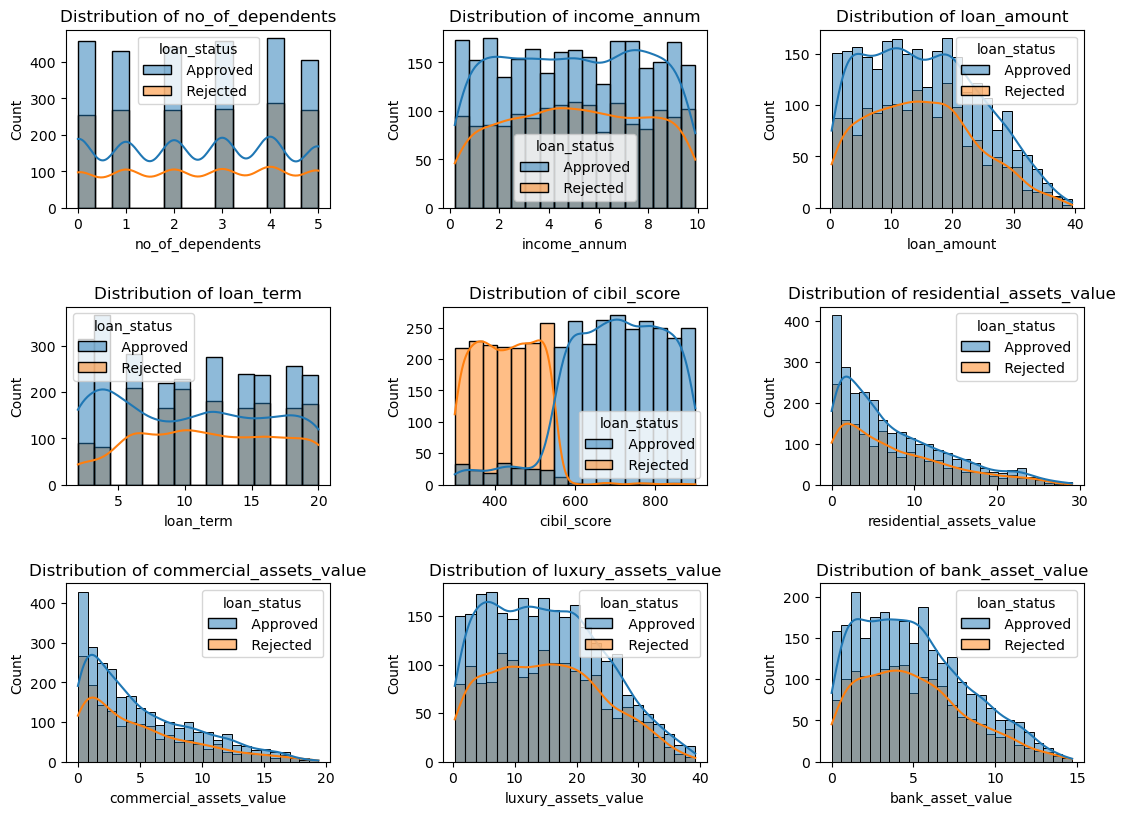

In [13]:
## Observe the Distribution of the numerical variables in respect to the target variable
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))  # 3 rows, 3 columns
fig.tight_layout(pad=5.0)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot
for i, var in enumerate(num_cols):
    sns.histplot(data=df, x=var, hue='loan_status', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Show the plot
plt.show()

**The histograms indicate that none of the variables are normally distributed. From the graphs, it is evident that there are fewer number of customers owning high value residential, commercial and bank asset value. Majority of the customers own low value residential, commercial and bank assets.**

**Check for Outliers**

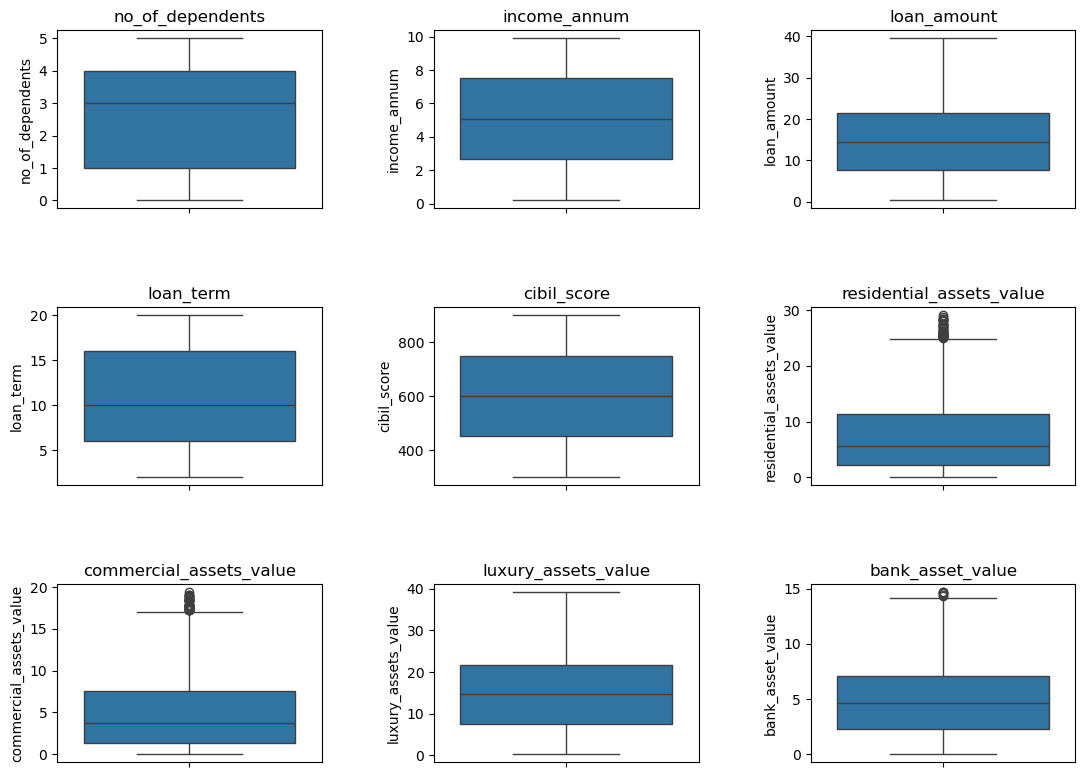

In [14]:
# Creating Boxplots to check for outliers
fig, axes = plt.subplots(3, 3, figsize=(12, 9))  # 3 rows, 3 columns
fig.tight_layout(pad=5.0)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot the boxplot
for i, var in enumerate(num_cols):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'{var}')

plt.show()

**The residential, commercial asset and bank asset value have outliers. We can perform shapiro-wilk test to ensure normal distribution.**

In [15]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
results = []
for var in num_cols:
    stat, p = shapiro(df[var])
    results.append({'Variable': var, 'Statistic': stat, 'p-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                   Variable  Statistic       p-value
0          no_of_dependents   0.907973  4.420326e-45
1              income_annum   0.956443  6.163744e-34
2               loan_amount   0.972036  4.126739e-28
3                 loan_term   0.936045  1.873984e-39
4               cibil_score   0.956605  6.933788e-34
5  residential_assets_value   0.898490  1.153470e-46
6   commercial_assets_value   0.897656  8.486845e-47
7       luxury_assets_value   0.970805  1.187896e-28
8          bank_asset_value   0.959780  7.587522e-33


**None of the variables are normally distributed. Some are more skewed than others.**

#### Correlation between the Numerical Variables

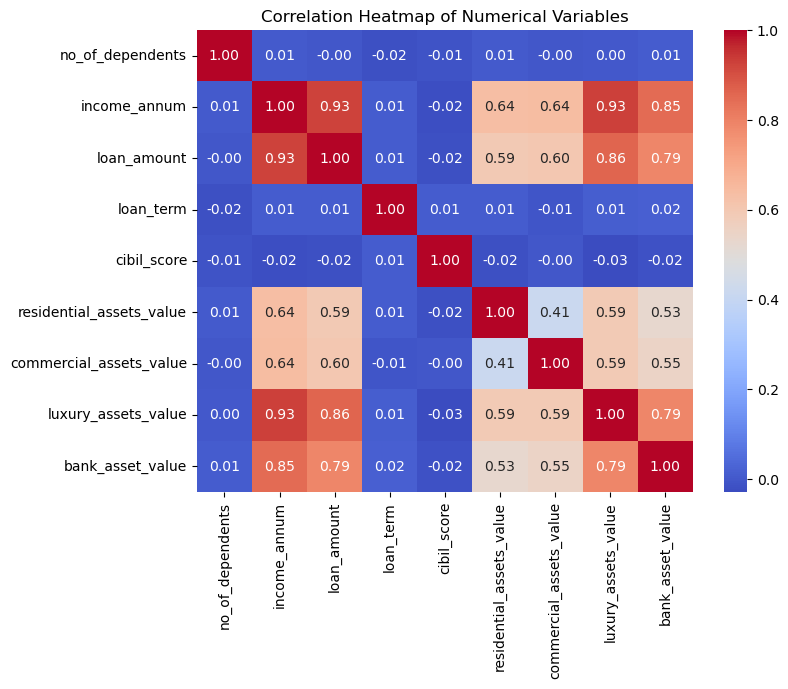

In [16]:
## We create a heatmap to observe the correlation between the numerical variables.
# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Numerical variables such as income, asset values (e.g., residential, commercial, bank and luxury) and loan amount are highly correlated. The annual income has a correlation of 0.93 with both applied loan amount and luxury asset value. This suggests that people with higher annual income are likely to apply for higher amount of loan and possess more luxury assets. We can observe the correlation between each pair of numerical variables in respect to the dependent variable (loan status) using scatter plot. Since, the heatmap indicated that income, asset values and loan amount are highly correlated. We focused on them.**

In [17]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

#### Correlation with Loan Amount

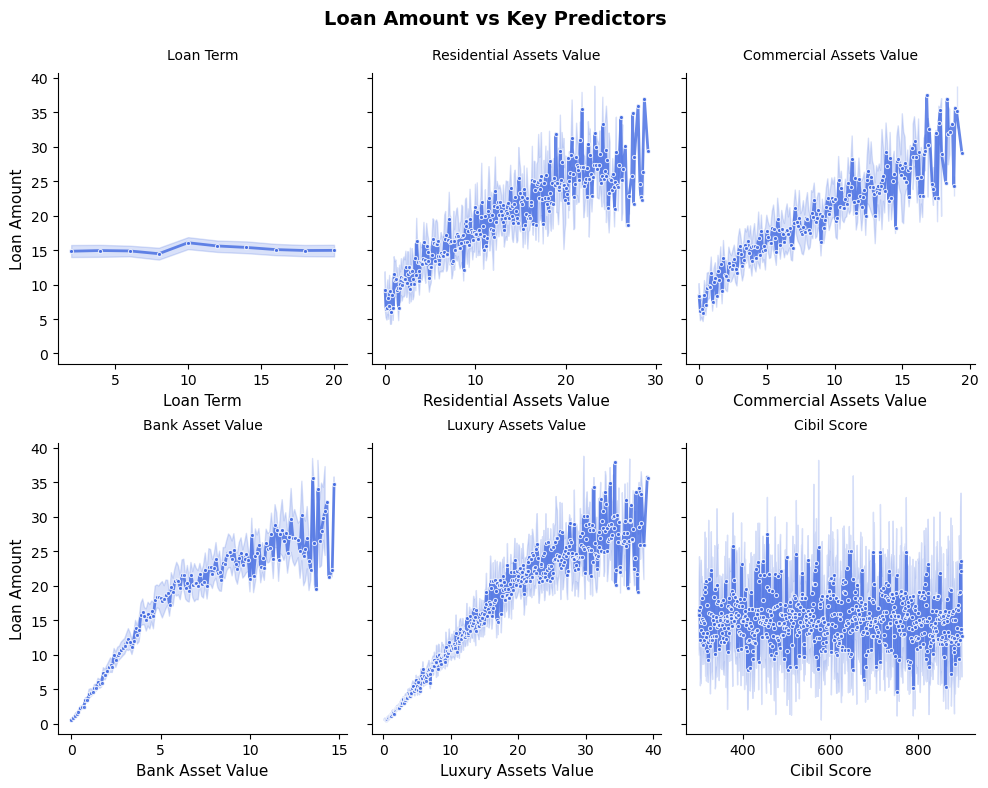

In [18]:
x_cols = ["loan_term","residential_assets_value","commercial_assets_value","bank_asset_value",
          "luxury_assets_value","cibil_score"]
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4*2), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    ax = axes[i]
    sns.lineplot(data=df,
        x=col,y="loan_amount",
        ax=ax,color="royalblue",
        linewidth=2,alpha=0.8,
        marker="o",markersize=3
    )
    # Titles and labels
    ax.set_title(col.replace("_", " ").title(), fontsize=10,pad=10)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=11)
    ax.set_ylabel("Loan Amount", fontsize=11)

    sns.despine(ax=ax)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle("Loan Amount vs Key Predictors", fontsize=14, fontweight='bold')
plt.show()

*It is only natural that loan applications with large loan amount have longer tenor. Furthermore, people who applied for larger amount of loans also possess large volume of assets.*

#### Correlation with Annual Income

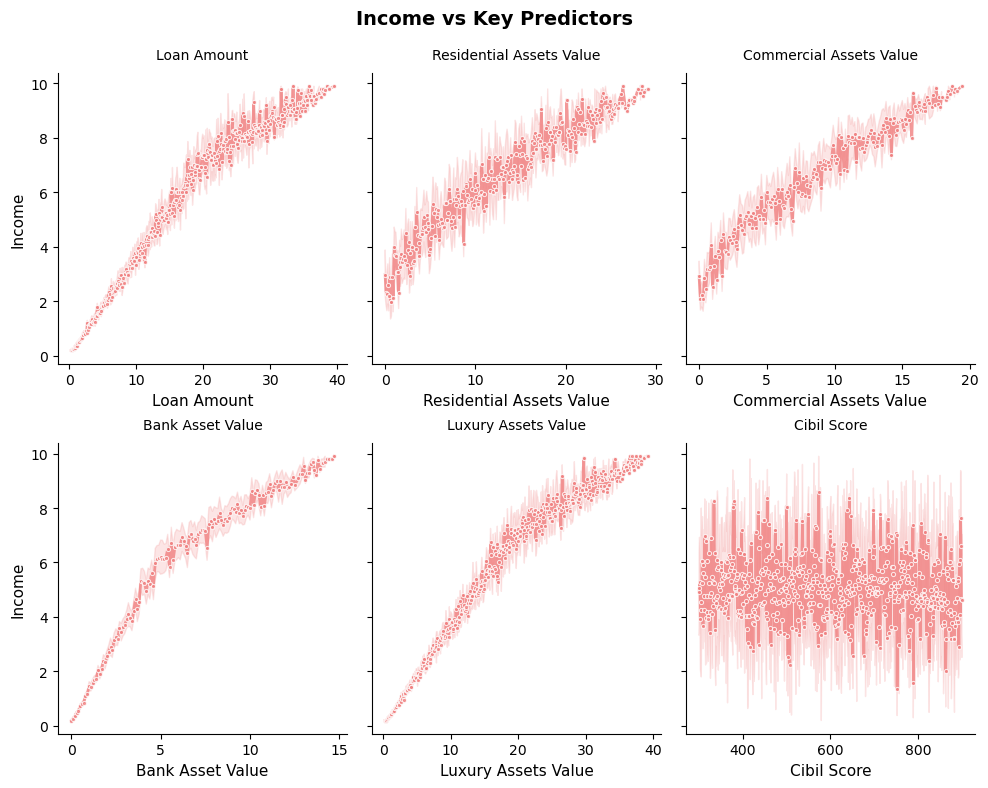

In [19]:
x_cols = ["loan_amount","residential_assets_value","commercial_assets_value","bank_asset_value",
          "luxury_assets_value","cibil_score"]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4*2), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    ax = axes[i]
    sns.lineplot(data=df,
        x=col,y="income_annum",
        ax=ax,color="lightcoral",
        linewidth=2,alpha=0.8,
        marker="o",markersize=3
    )
    # Titles and labels
    ax.set_title(col.replace("_", " ").title(), fontsize=10,pad=10)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=11)
    ax.set_ylabel("Income", fontsize=11)

    sns.despine(ax=ax)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle("Income vs Key Predictors", fontsize=14, fontweight='bold')
plt.show()

*There is a __positive correlation__ between Income and applied loan amount, residential, commercial, bank and luxury assets.*

**Striping white spaces from values in the categorical variables.**

In [60]:
# Checking the values of the categorical variables
for col in cat_cols:
  print(f"{col}: {df[col].unique()}")

education: [' Graduate' ' Not Graduate']
self_employed: [' No' ' Yes']
loan_status: [' Approved' ' Rejected']


In [61]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

*Let's create a copy of the dataset to work on the copy and keep the original for later use.*

In [62]:
df_vif = df.copy()

In [63]:
df_vif['loan_status'] = df_vif['loan_status'].map({'Approved':1, 'Rejected':0})
df_vif['education'] = df_vif['education'].map({'Graduate':1, 'Not Graduate':0})
df_vif['self_employed'] = df_vif['self_employed'].map({'Yes':1, 'No':0})

In [64]:
df_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   int64  
 2   self_employed             4269 non-null   int64  
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 400.3 KB


### Multiicollinearity
*To Check for __multicollinearity__, we use the variance inflation factor.*

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping the target variable
X = df_vif.drop(["loan_status"], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature        VIF
0           no_of_dependents   2.873516
1                  education   1.923650
2              self_employed   1.929466
3               income_annum  74.438727
4                loan_amount  27.247922
5                  loan_term   3.971265
6                cibil_score   6.467671
7   residential_assets_value   3.912251
8    commercial_assets_value   3.883198
9        luxury_assets_value  27.542225
10          bank_asset_value  12.156978


*__Annual Income__, __Applied Loan Amount__, __Luxury Assets__, __Bank Assets__ and __Cibil Score__ have high correlation with other predictors. In practice, variable with VIF > 5 is typically avoided. The test showed that __Annual Income__, __loan amount__, and __Luxury Assets__ have significantly high VIF score. To avoid significant multicollinearity, we will combine __Bank Assets__ and __Luxury Assets__ together and create one variable called __"movable_assets"__. Similarly, residential and commercial assets to __"immovable_assets"__. On the other hand, we will transform __Annual Income__ and __Loan Amount__ into one variable and create a variable called __loan to income ratio__.*     

In [66]:
# Movable Assets
df_vif["movable_assets"] = round((df_vif["luxury_assets_value"]+df_vif["bank_asset_value"]),2)

In [67]:
# Immovable Assets
df_vif["immovable_assets"] = round((df_vif["residential_assets_value"]+df_vif["commercial_assets_value"]),2)

In [68]:
# Loan to Income Ratio
df_vif["loan_income_ratio"] = round(df_vif["loan_amount"]/df_vif["income_annum"],2)

In [69]:
# Dropping Variables
X = df_vif.drop(["loan_status","luxury_assets_value","bank_asset_value","residential_assets_value","commercial_assets_value",
                 "loan_amount","income_annum"], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature        VIF
0   no_of_dependents   2.994621
1          education   1.964871
2      self_employed   1.970654
3          loan_term   4.307296
4        cibil_score   9.843850
5     movable_assets   7.656478
6   immovable_assets   5.684882
7  loan_income_ratio  12.814551


*The VIFs for __Movable Assets__, __Loan_Income_Ratio__, and __Immovable Assets__ are still greater than 5, but let's include them in the model and observe their information value __(IV)__.*

### Weight of Evidence and Information Value
*To determine the most important variables, __WOE__ and __IV__ are the most used methods in the field of credit risk modelling.*

*Before we calculate the WOE and IV, we need to discretize the numerical variables.*

In [88]:
df_woe = df.copy()
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 400.3+ KB


**Cibil Score**

In [89]:
# We can discretize Cibil Score using following bins as they are industry-standard 
scores = [300,549,649,699,749,900]
grades = ["poor","fair","good","very_good","excellent"]
df_woe["cibil_score"] = pd.cut(df_woe["cibil_score"],bins=scores, labels=grades,include_lowest=True)

**Loan Term**

In [90]:
terms = [0,5,10,20]
term_categories = ["short","medium","long"]
df_woe["loan_term_binned"] = pd.cut(df_woe["loan_term"],bins=terms,labels=term_categories,include_lowest=True)

*According to __Global Wealth Monitor__, the median wealth per adult in __India__ is __0.33__ million INR. Keeping this in mind, we discretize the __Movable__ and __Immovable__ assets.*

**Movable Assets**

In [91]:
assets_bins = [0,10,20,30,55]
assets_labels = ["low","moderate","high","very_high"]
df_woe["movable_assets"] = pd.cut(df_vif["movable_assets"],bins=assets_bins,labels=assets_labels,include_lowest=True)

**Immovable Assets**

In [92]:
assets_bins = [0,5,12,25,50]
assets_labels = ["low","moderate","high","very_high"]
df_woe["immovable_assets"] = pd.cut(df_vif["immovable_assets"],bins=assets_bins,labels=assets_labels,include_lowest=True)

**Loan to Income Ratio**

In [93]:
bins = [0,2,3,3.5,4.5]
labels = ["low","moderate","high","very_high"]
df_woe["loan_income_ratio_binned"] = pd.cut(df_vif["loan_income_ratio"],bins=bins,labels=labels,include_lowest=True)

**Number of Dependents**

In [94]:
no_dependents = [-1,0,2,4,float('inf')]
labels = ["none","few","moderate","many"]
df_woe["no_of_dependents_binned"] = pd.cut(df_vif["no_of_dependents"],bins=no_dependents,labels=labels,include_lowest=True)

In [95]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          4269 non-null   int64   
 1   education                 4269 non-null   object  
 2   self_employed             4269 non-null   object  
 3   income_annum              4269 non-null   float64 
 4   loan_amount               4269 non-null   float64 
 5   loan_term                 4269 non-null   int64   
 6   cibil_score               4269 non-null   category
 7   residential_assets_value  4269 non-null   float64 
 8   commercial_assets_value   4269 non-null   float64 
 9   luxury_assets_value       4269 non-null   float64 
 10  bank_asset_value          4269 non-null   float64 
 11  loan_status               4269 non-null   object  
 12  loan_term_binned          4269 non-null   category
 13  movable_assets            4269 non-null   catego

**Now, we will keep only the categorical columns.** 

In [97]:
df_discretized = df_woe.drop(columns=["no_of_dependents","income_annum","loan_amount","loan_term","residential_assets_value","commercial_assets_value",
                                     "luxury_assets_value","bank_asset_value"],axis=1)

In [98]:
df_discretized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   education                 4269 non-null   object  
 1   self_employed             4269 non-null   object  
 2   cibil_score               4269 non-null   category
 3   loan_status               4269 non-null   object  
 4   loan_term_binned          4269 non-null   category
 5   movable_assets            4269 non-null   category
 6   immovable_assets          4269 non-null   category
 7   loan_income_ratio_binned  4269 non-null   category
 8   no_of_dependents_binned   4269 non-null   category
dtypes: category(6), object(3)
memory usage: 126.3+ KB


In [99]:
df_discretized["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

#### Function to calculate Weight of Evidence (WOE) and Information Value (IV)

In [100]:
def cal_woe_iv(df: pd.DataFrame, target: str) -> dict:
    """The function calculates the weight of evidence and information value for a given feature,
    where 1 represents a default (bad outcome) and 0 represents non-default (good outcome).
    Args: 
    df: pd.DataFrame - the input dataframe.
    target: str - the target variable (loan status)

    Rreturns: Two dictionaries holding WOE and IV values. 
    """
    non_event = "Approved"
    event = "Rejected"
    total_no_good = (df[target] == non_event).sum()
    total_no_bad = (df[target] == event).sum()

    woe_dict_all = {}
    iv_dict = {}

    for col in df.drop(target,axis=1).columns:
        woe_dict_col = {}
        iv = 0

        grouped = df.groupby(col,observed=True)[target].value_counts().unstack(fill_value=0)

        for val in grouped.index:
            good = grouped.loc[val,non_event] if non_event in grouped.columns else 0
            bad = grouped.loc[val,event] if event in grouped.columns else 0

            # Add smoothing to avoid division by zero
            good = max(good, 0.50)
            bad = max(bad, 0.50)

            dist_good = good/total_no_good
            dist_bad = bad/total_no_bad

            woe = np.log(dist_good/dist_bad)
            woe_dict_col[val] = woe

            iv += (dist_good - dist_bad) * woe
        
        woe_dict_all[col] = woe_dict_col
        iv_dict[col] = iv
    
    return woe_dict_all,iv_dict

In [101]:
woe_dict, IV_dict = cal_woe_iv(df_discretized,"loan_status")

In [102]:
IV_df = pd.DataFrame(list(IV_dict.items()), columns=["Variable","IV"])
IV_df["IV"] = round(IV_df["IV"],4)
IV_df = IV_df.sort_values(by="IV", ascending=False)

In [103]:
IV_df

,Variable,IV
2,cibil_score,6.9412
3,loan_term_binned,0.1658
6,loan_income_ratio_binned,0.0354
4,movable_assets,0.0045
7,no_of_dependents_binned,0.0022
5,immovable_assets,0.0017
0,education,0.0001
1,self_employed,0.0000


**In practice, a variable with IV value less than 0.02 means that the variable has weak predictive power. Therefore, we will keep variables with IV greater than 0.02.**

In [107]:
wdf = df_vif.loc[:,["cibil_score","loan_term","loan_income_ratio","loan_status"]]

In [108]:
wdf.head(5)

,cibil_score,loan_term,loan_income_ratio,loan_status
0,778,12,3.11,1
1,417,8,2.98,0
2,506,20,3.26,0
3,467,8,3.74,0
4,382,20,2.47,0


In [109]:
import statsmodels.api as sm
log_reg = sm.Logit(wdf["loan_status"], wdf.drop(columns=["loan_status"],axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.368950
         Iterations 7


In [110]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4266
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 Nov 2025   Pseudo R-squ.:                  0.4435
Time:                        13:28:40   Log-Likelihood:                -1575.0
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
cibil_score           0.0123      0.000     32.609      0.000       0.012       0.013
loan_term            -0.1657      0.009    -19.442      0.000      -0.182      -0.149
loan_income_ratio    -1.

#### Summary
**The logistic regression results indicate that:**

**CIBIL Score (β = 0.0123, p < 0.001):**
*The positive and statistically significant coefficient suggests that a higher CIBIL score increases the log-odds of loan approval. This aligns with standard credit risk practices, where applicants with higher credit scores are    considered more creditworthy and thus more likely to be approved.*

**Loan Term (β = -0.1657, p < 0.001):**
The negative coefficient implies that longer loan tenures reduce the log-odds of loan approval. Longer repayment periods often increase the lender’s risk exposure, as they are more uncertain and subject to future financial changes of the borrower. Therefore, this negative relationship is financially consistent.

**Loan-to-Income Ratio (β = -1.4561, p < 0.001):**
*A higher loan-to-income ratio significantly reduces the likelihood of loan approval. This indicates that when the loan amount is large relative to income, the applicant is perceived as riskier, consistent with prudent credit assessment principles.*

#### Model Evaluation

In [115]:
from sklearn.model_selection import train_test_split

# Define features and target
X = wdf.loc[:,["cibil_score", "loan_term", "loan_income_ratio"]]
y = wdf["loan_status"]

# Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [116]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [117]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9133
F1 Score: 0.9306
ROC AUC Score: 0.9733


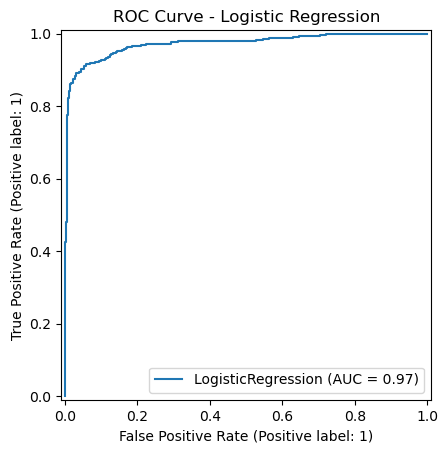

In [119]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

### PSI Test

In [137]:
def psi_index(expected: np.array, actual: np.array, buckets=10, epsilon=1e-4):
    """
    Calculate Population Stability Index (PSI) between two distributions.
    
    Parameters:
    -----------
    expected : array-like
        Expected distribution (training data predictions)
    actual : array-like
        Actual distribution (test/production data)
    buckets : int, default=10
        Number of bins to use for PSI calculation
    epsilon : float, default=1e-4
        Small value to replace zeros and prevent log(0) errors
    Returns:
    --------
    float
        PSI value
    """
    breakpoints = np.linspace(0,100,buckets+1)
    expected_percentage = np.percentile(expected, breakpoints)
    actual_percentage = np.percentile(actual, breakpoints)

    expected_bins = np.histogram(expected_percentage, bins=expected_percentage)[0] / len(expected)
    actual_bins = np.histogram(actual_percentage, bins=actual_percentage)[0] / len(actual)

    # Avoid divide-by-zero or log(0)
    expected_bins = np.where(expected_bins == 0, epsilon, expected_bins)
    actual_bins = np.where(actual_bins == 0, epsilon, actual_bins)

    psi_values = np.sum((expected_bins - actual_bins) * np.log(expected_bins/actual_bins))

    return psi_values
    
# Predicted probabilities on train and test sets
train_pred_proba = model.predict_proba(X_train)[:, 1]
test_pred_proba = model.predict_proba(X_test)[:, 1]

psi_values = psi_index(train_pred_proba, test_pred_proba)
print(f"PSI Value: {psi_values:.4f}")

PSI Value: 0.0042


**The PSI indicated that the model is highly stable. The probability distribution in the test data is almost the same as the training data.**